# Drill: Prepare the Data

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn as sk
%matplotlib inline

In [2]:
df = pd.read_excel('./data/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', header=4)
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


First, I set the index of the dataset as "City".

In [3]:
df = df.set_index('City')
df.head()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
City,,,,,,,,,,,,
Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


And, I drop out the unnecessary columns in the dataset.

In [4]:
df.columns

Index(['Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [5]:
df = df.drop(['Violent\ncrime', 'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2', 
         'Aggravated\nassault', 'Property\ncrime', 'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'], axis=1)
df.head(20)

,Population,Murder and nonnegligent manslaughter,Robbery,Burglary
City,,,,
Adams Village,1861.0,0.0,0.0,2.0
Addison Town and Village,2577.0,0.0,0.0,3.0
Akron Village,2846.0,0.0,0.0,1.0
Albany,97956.0,8.0,227.0,705.0
Albion Village,6388.0,0.0,4.0,53.0
Alfred Village,4089.0,0.0,3.0,10.0
Allegany Village,1781.0,0.0,0.0,0.0
Amherst Town,118296.0,1.0,31.0,204.0
Amityville Village,9519.0,0.0,4.0,16.0


And... I make the columns simpler.

In [6]:
df = df.rename(index=str, columns={'Population':'Pop', 'Murder and\nnonnegligent\nmanslaughter':'Murder'})
df.head(20)

,Pop,Murder,Robbery,Burglary
City,,,,
Adams Village,1861.0,0.0,0.0,2.0
Addison Town and Village,2577.0,0.0,0.0,3.0
Akron Village,2846.0,0.0,0.0,1.0
Albany,97956.0,8.0,227.0,705.0
Albion Village,6388.0,0.0,4.0,53.0
Alfred Village,4089.0,0.0,3.0,10.0
Allegany Village,1781.0,0.0,0.0,0.0
Amherst Town,118296.0,1.0,31.0,204.0
Amityville Village,9519.0,0.0,4.0,16.0


Now, check any index with null data.

In [7]:
df.isnull().sum()

Pop         3
Murder      3
Robbery     3
Burglary    3
dtype: int64

In [8]:
df = df.dropna(axis=0)
df

,Pop,Murder,Robbery,Burglary
City,,,,
Adams Village,1861.0,0.0,0.0,2.0
Addison Town and Village,2577.0,0.0,0.0,3.0
Akron Village,2846.0,0.0,0.0,1.0
Albany,97956.0,8.0,227.0,705.0
Albion Village,6388.0,0.0,4.0,53.0
Alfred Village,4089.0,0.0,3.0,10.0
Allegany Village,1781.0,0.0,0.0,0.0
Amherst Town,118296.0,1.0,31.0,204.0
Amityville Village,9519.0,0.0,4.0,16.0


In this time, let's check the outlier. 

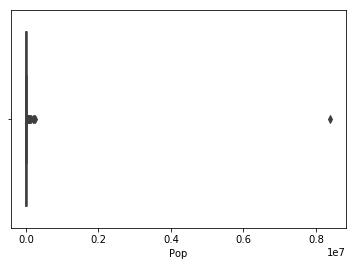

In [9]:
sns.boxplot(x='Pop', data=df)
plt.show()

We found out there is an extrem one!! What is it?

In [10]:
df.Pop.idxmax()

'New York'

Yes, it is "New York". Get rid of it!

In [11]:
df = df.drop('New York')

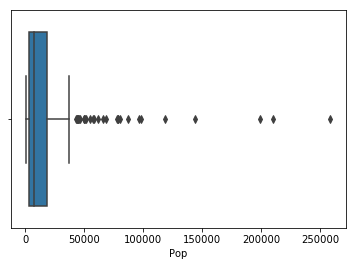

In [12]:
sns.boxplot(x='Pop', data=df)
plt.show()

Add new features mentioned in the prescribed model.

In [13]:
df['Pop_Sq'] = df['Pop']**2
df['Murder_Cat'] = np.where(df['Murder']>0, 1, 0)
df['Roberry_Cat'] = np.where(df['Robbery']>0, 1, 0)

df.head()

,Pop,Murder,Robbery,Burglary,Pop_Sq,Murder_Cat,Roberry_Cat
City,,,,,,,
Adams Village,1861.0,0.0,0.0,2.0,3.463321e+06,0,0
Addison Town and Village,2577.0,0.0,0.0,3.0,6.640929e+06,0,0
Akron Village,2846.0,0.0,0.0,1.0,8.099716e+06,0,0
Albany,97956.0,8.0,227.0,705.0,9.595378e+09,1,1
Albion Village,6388.0,0.0,4.0,53.0,4.080654e+07,0,1


Let's check the relationships between the variables!

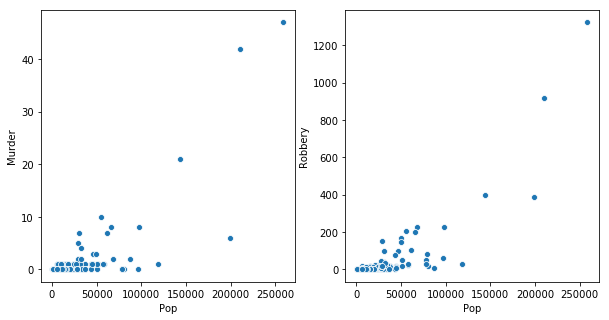

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
sns.scatterplot(x='Pop', y='Murder', data=df, ax=ax1)
sns.scatterplot(x='Pop', y='Robbery', data=df, ax=ax2)
plt.show()

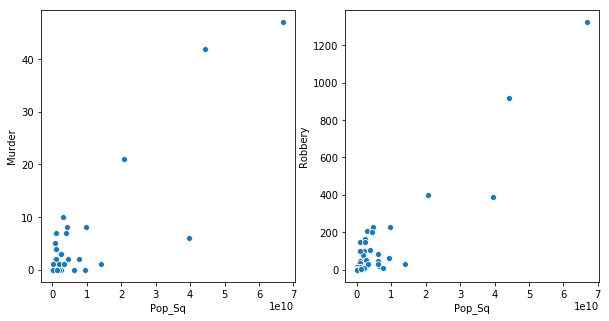

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
sns.scatterplot(x='Pop_Sq', y='Murder', data=df, ax=ax1)
sns.scatterplot(x='Pop_Sq', y='Robbery', data=df, ax=ax2)
plt.show()